# Exercise 1

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# Ex 1.1
p1 = np.array([1, 2, 1])
p2 = np.array([4, 2, 2])
p3 = np.array([6, 4, -1])
p4 = np.array([5, 3, 0.5])

q1 = p1[:2] / p1[2]
q2 = p2[:2] / p2[2]
q3 = p3[:2] / p3[2]
q4 = p4[:2] / p4[2]

print(q1, q2, q3, q4)

[1. 2.] [2. 1.] [-6. -4.] [10.  6.]


In [3]:
# Ex 1.2
p1 = np.array([1, 10, -3, 1])
p2 = np.array([2, -4, 1.1, 2])
p3 = np.array([0, 0, -1, 10])
p4 = np.array([-15, 3, 6, 3])

q1 = p1[:-1] / p1[-1]
q2 = p2[:-1] / p2[-1]
q3 = p3[:-1] / p3[-1]
q4 = p4[:-1] / p4[-1]

print(q1, q2, q3, q4)

[ 1. 10. -3.] [ 1.   -2.    0.55] [ 0.   0.  -0.1] [-5.  1.  2.]


Ex 1.3

$$
    \begin{align*}
    x + 2y &= 3 \\
    0 &= x + 2y - 3 \\
    0 & = \begin{bmatrix}
    1 \\
    2 \\
    -3
    \end{bmatrix}^T
    \begin{bmatrix}
    x \\
    y \\
    1
    \end{bmatrix} \\
    \therefore l &= \begin{bmatrix}
    1 \\
    2 \\
    -3
    \end{bmatrix}
    \end{align*}
$$

In [4]:
# Ex 1.4, 2D points on a line
lt = np.array([1, 2, -3])

p1 = np.array([3, 0, 1])
p2 = np.array([6, 0, 2])
p3 = np.array([1, 1, 2])
p4 = np.array([1, 1, 1])
p5 = np.array([110, -40, 10])
p6 = np.array([11, 4, 1])

p1 = np.expand_dims(p1, axis=1)
p2 = np.expand_dims(p2, axis=1)
p3 = np.expand_dims(p3, axis=1)
p4 = np.expand_dims(p4, axis=1)
p5 = np.expand_dims(p5, axis=1)
p6 = np.expand_dims(p6, axis=1)

p = np.hstack((p1, p2, p3, p4, p5, p6))
p.shape

(3, 6)

In [5]:
lt @ p
# Ans: p1, p2, p4, p5 lie on the line

array([ 0,  0, -3,  0,  0, 16])

In [6]:
# Ex 1.5, intersection of 2 lines
l0 = np.array([1, 1, -1])
l1 = np.array([-1, 1, -3])
np.cross(l0, l1)  # cross product

array([-2,  4,  2])

In [7]:
def point_line_distance(line, p):
    """
    Calculate shortest distance d between line l
    and 2D homogenous point p.

    e.g.
    line = np.array([1,0,1])
    p = np.array([0,0,1])
    """
    d = abs(line @ p) / (abs(p[2]) * np.sqrt(line[0] ** 2 + line[1] ** 2))
    return d

Ex 1.6

$Ap = q$, where $p$ is the input point, and $q$ is the output point.

The $10$ scales both x and y coordinates by 10. While the x-coordinate is translated by $2$ units, and y-coordinate translted by $3$ units.

In [8]:
# Ex 1.7
rt2 = np.sqrt(2)
line = np.array([1 / rt2, 1 / rt2, -1])

p1 = np.array([0, 0, 1])
p2 = np.array([rt2, rt2, 1])
p3 = np.array([rt2, rt2, 4])

p1 = np.expand_dims(p1, axis=1)
p2 = np.expand_dims(p2, axis=1)
p3 = np.expand_dims(p3, axis=1)

print(line @ p1)
print(line @ p2)
print(line @ p3)

print(point_line_distance(line, p1))
print(point_line_distance(line, p2))
print(point_line_distance(line, p3))

[-1.]
[1.]
[-2.]
[1.]
[1.]
[0.5]


In [9]:
# Ex 1.8
line = np.array([2, 2, -1])

p1 = np.array([0, 0, 1])
p2 = np.array([rt2, rt2, 1])
p3 = np.array([rt2, rt2, 4])

p1 = np.expand_dims(p1, axis=1)
p2 = np.expand_dims(p2, axis=1)
p3 = np.expand_dims(p3, axis=1)

print(line @ p1)
print(line @ p2)
print(line @ p3)

print(point_line_distance(line, p1))
print(point_line_distance(line, p2))
print(point_line_distance(line, p3))

[-1]
[4.65685425]
[1.65685425]
[0.35355339]
[1.64644661]
[0.14644661]


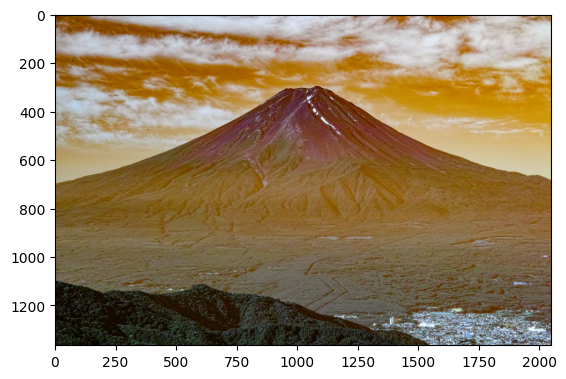

In [10]:
# Ex 1.9
img = cv2.imread("media/Fuji.jpg")
plt.imshow(img)

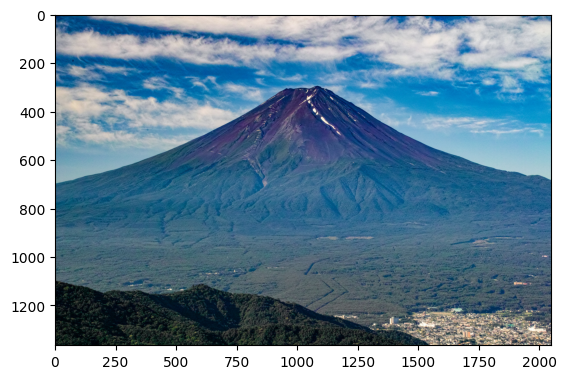

In [11]:
# openCV reads BGR, plt uses RGB
plt.imshow(img[:, :, ::-1])  # flip channels

In [12]:
# Ex1.11
import itertools as it


def box3d(n=16):
    """Generate 3D points inside a cube with n-points along each edge"""
    points = []
    N = tuple(np.linspace(-1, 1, n))
    for i, j in [(-1, -1), (-1, 1), (1, 1), (0, 0)]:
        points.extend(set(it.permutations([(i,) * n, (j,) * n, N])))
    return np.hstack(points) / 2

In [13]:
# Ex 1.12
def Pi(ph):
    """
    Converts coordinates from homogeneous to inhomogeneous.
    ph : 4xn np.array
    p : 3xn np.array
    """
    p = ph[:-1] / ph[-1]  # divide by and remove last coordinate
    return p


def PiInv(p):
    """
    Converts coordinates from inhomogeneous to homogeneous.
    p : 3xn np.array
    ph : 4xn np.array
    """
    ph = np.vstack((p, np.ones(p.shape[1])))
    return ph

In [14]:
p1 = np.array([[3], [0], [1], [1]])
p2 = np.array([[3], [0], [1], [2]])
p3 = np.array([[3], [0], [1], [3]])
ph = np.hstack((p1, p2, p3))

p = Pi(ph)
print(p)

ph2 = PiInv(p)
print(ph2)

[[3.         1.5        1.        ]
 [0.         0.         0.        ]
 [1.         0.5        0.33333333]]
[[3.         1.5        1.        ]
 [0.         0.         0.        ]
 [1.         0.5        0.33333333]
 [1.         1.         1.        ]]


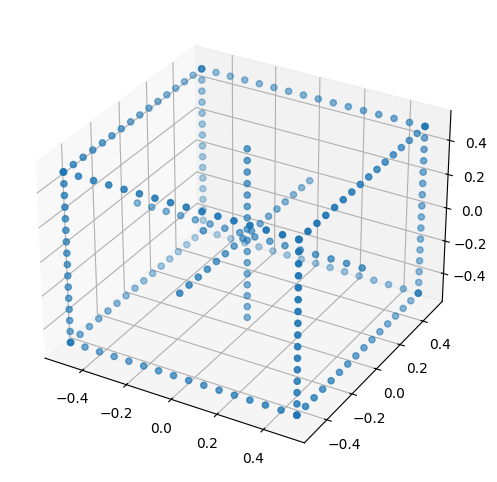

In [15]:
box = box3d()  # 3x240 matrix

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection="3d")
ax.scatter(box[0, :], box[1, :], box[2, :])
plt.show()

In [16]:
# Ex 1.13
def projectpoints(K, R, t, Q):
    """
    Project 3D points in Q onto a 2D plane of a camera

    K : 3 x 3, intrinsic camera matrix
    R : 3 x 3, rotation matrix
    t: 3 x 1, translation matrix
    Q: 3 x n, 3D points matrix

    P : 2 x n, 2D points matrix
    """
    Qh = PiInv(Q)  # 4 x n
    pose = np.hstack((R, t))  # 3 x 4
    Ph = K @ pose @ Qh  # 3 x n
    P = Pi(Ph)  # 2 x n
    return P

In [17]:
Q = box3d()  # 3x240 matrix
K = np.eye(3)

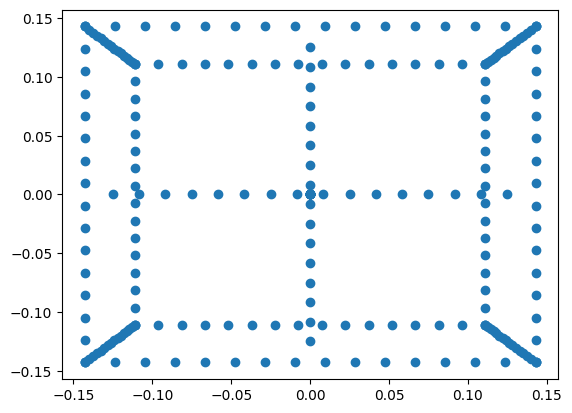

In [18]:
R = np.eye(3)
t = np.array([[0, 0, 4]]).T
P = projectpoints(K, R, t, Q)
plt.scatter(P[0, :], P[1, :])
plt.show()

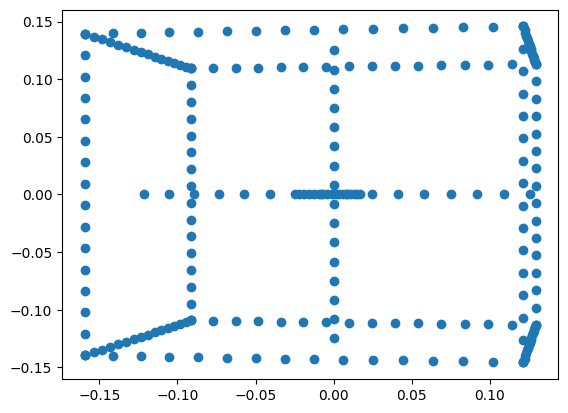

In [19]:
# Ex 1.14
th = 30
R = np.array([[np.cos(th), 0, np.sin(th)], [0, 1, 0], [-np.sin(th), 0, np.cos(th)]])
t = np.array([[0, 0, 4]]).T

P = projectpoints(K, R, t, Q)
plt.scatter(P[0, :], P[1, :])
plt.show()

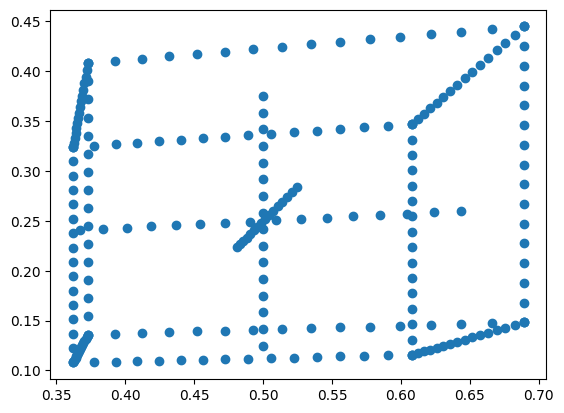

In [20]:
# Ex 1.15
th = 60
R = np.array([[np.cos(th), 0, np.sin(th)], [0, 1, 0], [-np.sin(th), 0, np.cos(th)]])
t = np.array([[2, 1, 4]]).T

P = projectpoints(K, R, t, Q)
plt.scatter(P[0, :], P[1, :])
plt.show()